# Round 1 
### Submission date for Round 1 - 18th March, 11:59PM

# Data Description 
 You are provided with employment related data for a period of 8 years, from 2005-2012. The task is to analyze the data and answer 8 set of questions. The final task is to predict the employment status for the test set. Note that the test file as well as training file consists of data from all the 8 years. Creating a robust model that can handle such situations is part of the challenge. File descriptions <br>• Training Dataset.xlsx- the training set. Employment data from 2005 to October 2012. <br>• Test Dataset.xlsx- the test set. You need to forecast the employment status for different Id’s and from 2005-2012. <br>• Questions.pdf- Set of 8 analytical questions. <br>• Data Description Data fields <br>• ID: An Id that represents a person within the training set 
<br>• Education: It represents Education level of a person (9th, 10th, 11th, 12th grade, Associate, bachelor’s, master’s degree etc.)
<br>• Age: Age of a person
<br>• Age range: Age Range of a person (0-19, 20-29, 30-39………70-79, 80+)
<br>• Employment: Whether that person is employed or not
<br>• Children: Number of children a person has
<br>• Weekly earnings: Earnings in dollars/week
<br>• Column k- Column x: Average time spend by a person on a particular activity per day in minutes
<br>• Total: Total of average time spend (In hours) by a person in a day.<br>
Note: values of this column may exceed above 24hrs (2 activities may have been considered twice). Like Food & drink prep is considered individually as well as in housework (Assumption)

# Questions
1. Summary of time spending pattern in 2014 (like time spend per activity e.g. Socializing, eating, working, etc.)
2. How does the spending time in question 1 changes based on age, working status, education level etc.
3. How time spend on baby care is changing based on education, working hours, income. (consider all years). Other factors can also be considered.
4. How leisure time changing based on income and is there difference between generations leisure spending time
5. Is there any change in the pattern when the great recession happened? And if yes, then has that continued?
6. Based on age what is an individual’s primary activity
7. Which is the most significant variable effecting the employment as well as unemployment.
8. Predict the values for employment variable in the test data set
• Note: You can submit additional analysis as well apart from the above-mentioned question.


# Part 1 - Data Exploration

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [23]:
train = pd.read_excel('Training Dataset.xlsx')
test = pd.read_excel('Test Dataset.xlsx')

In [24]:
train.head()

Id Education Level  Age Age Range   Employment Status  Gender  Children  \
0   1     High School   51     50-59          Unemployed  Female         0   
1   2        Bachelor   42     40-49            Employed  Female         2   
2   3          Master   47     40-49            Employed    Male         0   
3   4    Some College   21     20-29            Employed  Female         0   
4   5     High School   49     40-49  Not in labor force  Female         0   

   Weekly Earnings  Year  Weekly Hours Worked    ...      \
0                0  2005                    0    ...       
1             1480  2005                   40    ...       
2              904  2005                   40    ...       
3              320  2005                   40    ...       
4                0  2005                    0    ...       

   Playing with Children  Job Searching  Shopping  Eating and Drinking  \
0                      0              0         0                   40   
1                     20              0       120                   40   
2                      0              0        15                   85   
3                      0              0       105                   30   
4                      0              0         0                   35   

   Socializing & Relaxing  Television  Golfing  Running  Volunteering  \
0                     180         120        0        0             0   
1                      15          15        0        0             0   
2                     214         199        0        0             0   
3                     240         240        0        0             0   
4                     600          40        0        0             0   

       Total  
0  24.000000  
1  21.583333  
2  17.733333  
3  26.833333  
4  23.750000  

[5 rows x 25 columns]

## Test 1 - Check for null values

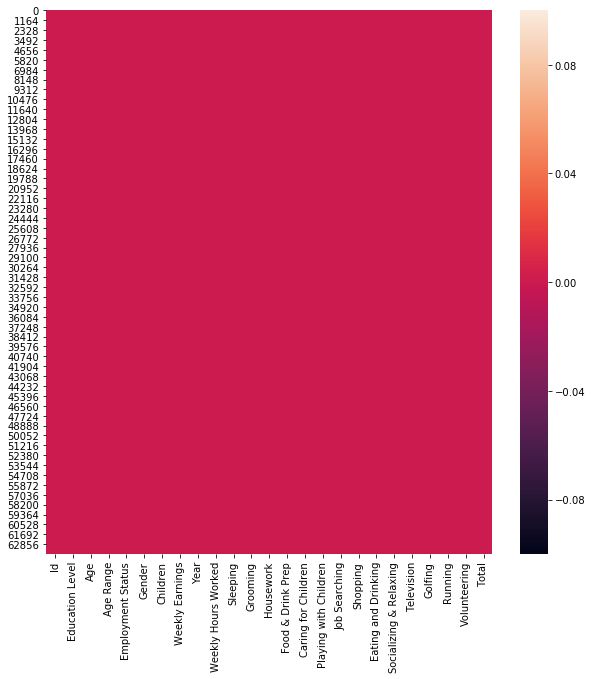

In [32]:
# sns.heatmap(train.isnull())
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull())

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

##  Result | Test 1
No null values found. However, data cleaning and feature engineering may be required

In [27]:
train.describe()

Id           Age      Children  Weekly Earnings  \
count  64006.000000  64006.000000  64006.000000     64006.000000   
mean   32003.500000     46.260569      0.891291       485.697872   
std    18477.085002     17.396500      1.146851       639.891303   
min        1.000000     15.000000      0.000000         0.000000   
25%    16002.250000     33.000000      0.000000         0.000000   
50%    32003.500000     45.000000      0.000000       240.000000   
75%    48004.750000     59.000000      2.000000       769.000000   
max    64006.000000     85.000000     12.000000      2885.000000   

               Year  Weekly Hours Worked      Sleeping      Grooming  \
count  64006.000000         64006.000000  64006.000000  64006.000000   
mean    2008.500109            24.508796    522.240368     40.591116   
std        2.291258            22.274917    135.669820     36.713372   
min     2005.000000             0.000000      0.000000      0.000000   
25%     2007.000000             0.000000    445.000000     10.000000   
50%     2009.000000            30.000000    510.000000     30.000000   
75%     2010.750000            40.000000    600.000000     60.000000   
max     2012.000000           160.000000   1423.000000   1043.000000   

          Housework  Food & Drink Prep      ...       Playing with Children  \
count  64006.000000       64006.000000      ...                64006.000000   
mean      41.246618          34.287879      ...                    8.498172   
std       82.483654          53.508507      ...                   39.001215   
min        0.000000           0.000000      ...                    0.000000   
25%        0.000000           0.000000      ...                    0.000000   
50%        0.000000          10.000000      ...                    0.000000   
75%       55.000000          50.000000      ...                    0.000000   
max     1405.000000         995.000000      ...                  840.000000   

       Job Searching      Shopping  Eating and Drinking  \
count   64006.000000  64006.000000         64006.000000   
mean        1.700606     24.668234            68.652189   
std        20.706929     49.144949            52.639850   
min         0.000000      0.000000             0.000000   
25%         0.000000      0.000000            30.000000   
50%         0.000000      0.000000            60.000000   
75%         0.000000     30.000000            90.000000   
max       983.000000    879.000000           895.000000   

       Socializing & Relaxing    Television       Golfing       Running  \
count            64006.000000  64006.000000  64006.000000  64006.000000   
mean               288.137925    165.160735      1.293191      0.686201   
std                206.163299    168.431664     18.539409      7.421383   
min                  0.000000      0.000000      0.000000      0.000000   
25%                125.000000     30.000000      0.000000      0.000000   
50%                250.000000    120.000000      0.000000      0.000000   
75%                414.000000    240.000000      0.000000      0.000000   
max               1434.000000   1380.000000    600.000000    505.000000   

       Volunteering         Total  
count  64006.000000  64006.000000  
mean       9.831953     20.615301  
std       49.762815      6.194366  
min        0.000000      0.000000  
25%        0.000000     15.833333  
50%        0.000000     20.500000  
75%        0.000000     24.833333  
max     1127.000000     46.666667  

[8 rows x 21 columns]

## Test 2 - Correlation Analysis - Using Seaborn pairplot

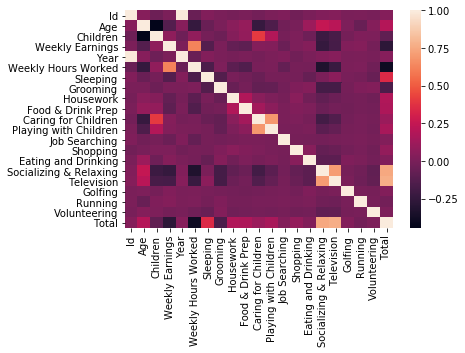

In [38]:
sns.heatmap(train.corr())

### No strong correlations seen here. Maybe we'll need to do some data engineering and work with variables that give us insights

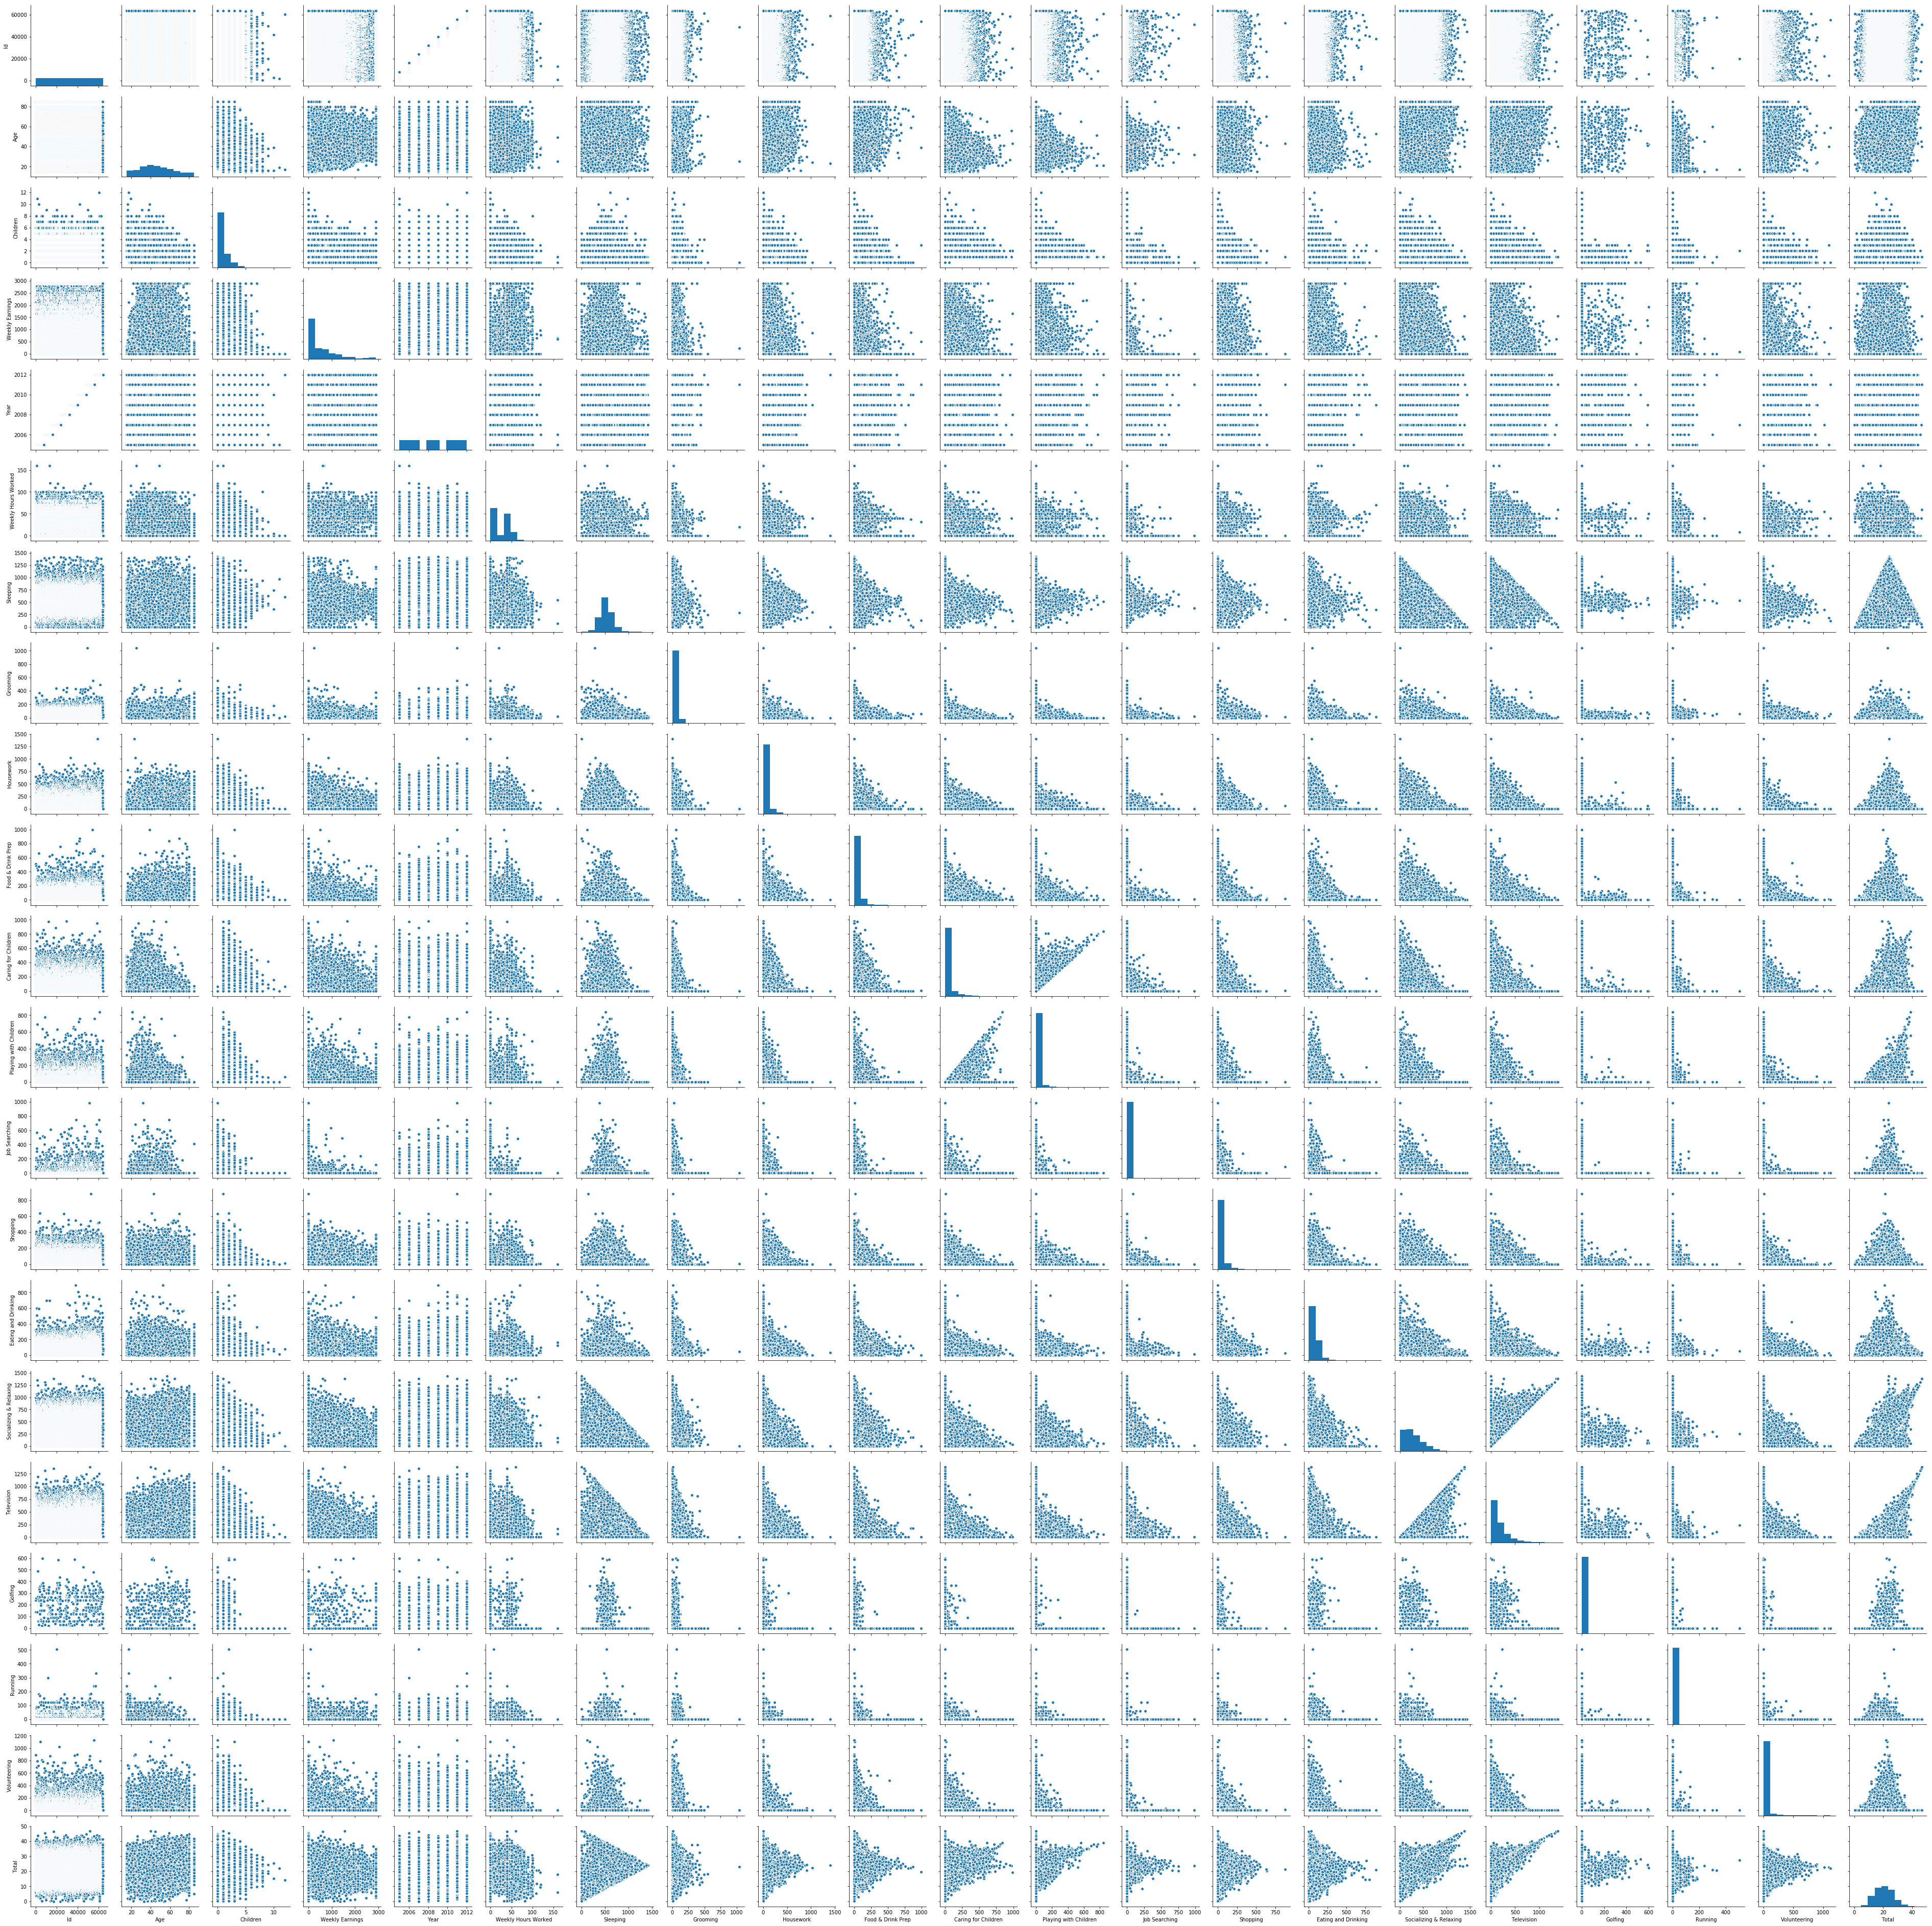

In [28]:
sns.pairplot(train)

## Result Test 2 - 
### The Pairplot looks very complex. Need to filter out unnecessary dimensions based on guesswork

In [79]:
train.columns

Index(['Id', 'Education Level', 'Age', 'Age Range', 'Employment Status',
       'Gender', 'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked',
       'Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering', 'Total'],
      dtype='object')

In [33]:
train['Year'].value_counts()

2012    8001
2011    8001
2010    8001
2009    8001
2008    8001
2007    8001
2006    8001
2005    7999
Name: Year, dtype: int64

In [37]:
test['Year'].value_counts()

2010    4682
2009    4533
2005    4356
2006    4223
2008    4087
2012    3913
2011    3877
2007    3599
Name: Year, dtype: int64